In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
amazon_data = pd.read_csv('amazon.csv')
amazon_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,2.730729,2.966667,2.665625,2.957813,2.957813,785844000
1,1999-01-05,2.739063,3.243750,2.662500,3.112500,3.112500,1257464000
2,1999-01-06,3.409375,3.509375,3.350000,3.450000,3.450000,723532000
3,1999-01-07,3.428125,4.006250,3.325000,3.971875,3.971875,945492000
4,1999-01-08,4.606250,4.978125,3.800000,4.006250,4.006250,1333244000
...,...,...,...,...,...,...,...
6034,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
6035,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
6036,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
6037,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


In [3]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6039 non-null   object 
 1   Open       6039 non-null   float64
 2   High       6039 non-null   float64
 3   Low        6039 non-null   float64
 4   Close      6039 non-null   float64
 5   Adj Close  6039 non-null   float64
 6   Volume     6039 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.4+ KB


In [4]:
amazon_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6039.000000,6039.000000,6039.000000,6039.000000,6039.000000,6.039000e+03
mean,33.032739,33.424013,32.598322,33.016059,33.016059,1.334297e+08
std,48.808735,49.374865,48.170554,48.767219,48.767219,1.147912e+08
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.762600e+07
25%,2.267000,2.303500,2.226000,2.264250,2.264250,6.955200e+07
50%,8.675000,8.758500,8.576500,8.685500,8.685500,1.054160e+08
75%,41.047501,41.131498,40.737999,40.933750,40.933750,1.560990e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


In [5]:

splitted = amazon_data['Date'].str.split('-', expand=True)
 
amazon_data['day'] = splitted[2].astype('int')
amazon_data['month'] = splitted[1].astype('int')
amazon_data['year'] = splitted[0].astype('int')
 
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,1999-01-04,2.730729,2.966667,2.665625,2.957813,2.957813,785844000,4,1,1999
1,1999-01-05,2.739063,3.243750,2.662500,3.112500,3.112500,1257464000,5,1,1999
2,1999-01-06,3.409375,3.509375,3.350000,3.450000,3.450000,723532000,6,1,1999
3,1999-01-07,3.428125,4.006250,3.325000,3.971875,3.971875,945492000,7,1,1999
4,1999-01-08,4.606250,4.978125,3.800000,4.006250,4.006250,1333244000,8,1,1999


In [6]:
amazon_data = amazon_data.drop('Date', axis=1)
amazon_data

,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2.730729,2.966667,2.665625,2.957813,2.957813,785844000,4,1,1999
1,2.739063,3.243750,2.662500,3.112500,3.112500,1257464000,5,1,1999
2,3.409375,3.509375,3.350000,3.450000,3.450000,723532000,6,1,1999
3,3.428125,4.006250,3.325000,3.971875,3.971875,945492000,7,1,1999
4,4.606250,4.978125,3.800000,4.006250,4.006250,1333244000,8,1,1999
...,...,...,...,...,...,...,...,...,...
6034,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,23,12,2022
6035,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,27,12,2022
6036,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,28,12,2022
6037,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,29,12,2022


In [7]:
amazon_data[amazon_data['Close'] == amazon_data['Adj Close']].shape

(6039, 9)

In [8]:
amazon_data = amazon_data.drop('Adj Close', axis=1)
amazon_data

,Open,High,Low,Close,Volume,day,month,year
0,2.730729,2.966667,2.665625,2.957813,785844000,4,1,1999
1,2.739063,3.243750,2.662500,3.112500,1257464000,5,1,1999
2,3.409375,3.509375,3.350000,3.450000,723532000,6,1,1999
3,3.428125,4.006250,3.325000,3.971875,945492000,7,1,1999
4,4.606250,4.978125,3.800000,4.006250,1333244000,8,1,1999
...,...,...,...,...,...,...,...,...
6034,83.250000,85.779999,82.930000,85.250000,57433700,23,12,2022
6035,84.970001,85.349998,83.000000,83.040001,57284000,27,12,2022
6036,82.800003,83.480003,81.690002,81.820000,58228600,28,12,2022
6037,82.870003,84.550003,82.550003,84.180000,54995900,29,12,2022


In [9]:
amazon_data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
day       0
month     0
year      0
dtype: int64

In [10]:
amazon_data['is_quarter_end'] = np.where(amazon_data['month']%3==0,1,0)
amazon_data.head()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2.730729,2.966667,2.665625,2.957813,785844000,4,1,1999,0
1,2.739063,3.243750,2.662500,3.112500,1257464000,5,1,1999,0
2,3.409375,3.509375,3.350000,3.450000,723532000,6,1,1999,0
3,3.428125,4.006250,3.325000,3.971875,945492000,7,1,1999,0
4,4.606250,4.978125,3.800000,4.006250,1333244000,8,1,1999,0


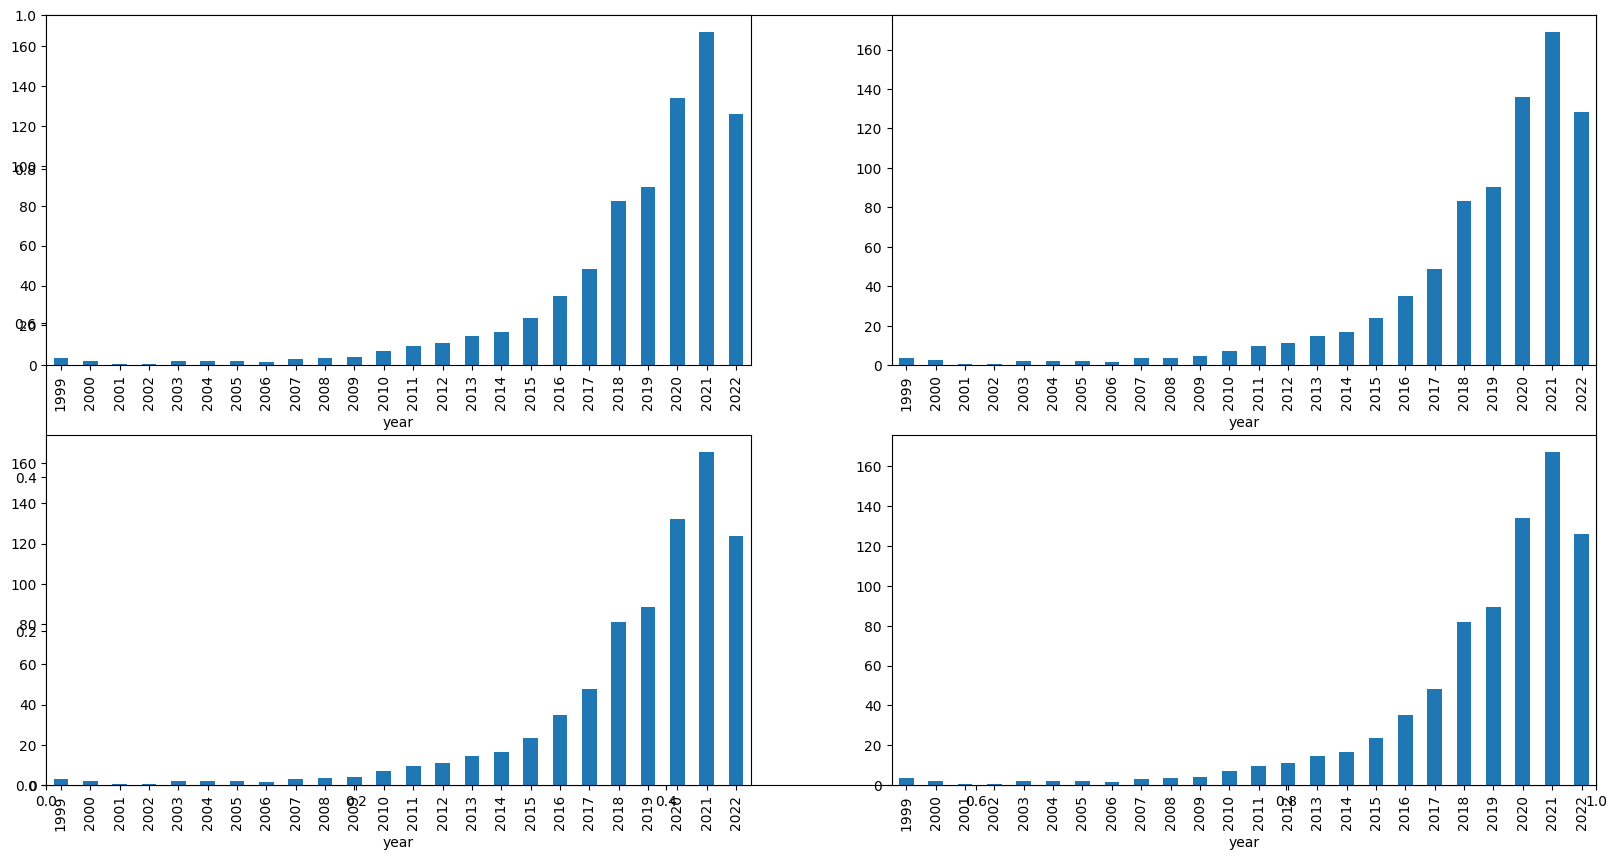

In [11]:
datas_by_year = amazon_data.groupby('year').mean()

plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  datas_by_year[col].plot.bar()
plt.show()

In [12]:
amazon_data.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,32.902782,33.302482,32.472112,32.894253,1.404799e+08,15.712254,6.094834,2010.492139
1,33.289006,33.663665,32.847202,33.256254,1.195270e+08,15.777067,7.433563,2010.527559


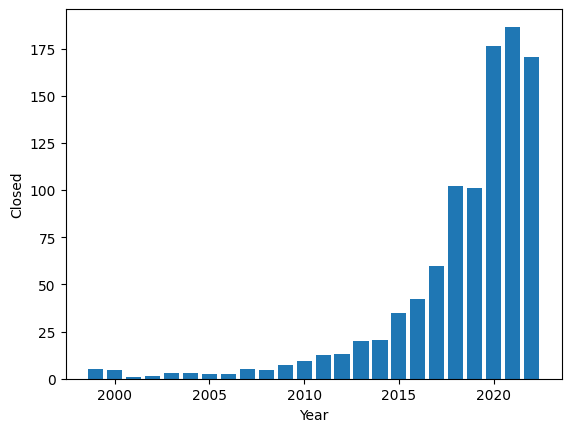

In [13]:
plt.bar(amazon_data['year'], amazon_data['Close'])
plt.xlabel('Year')
plt.ylabel('Closed')
plt.show()

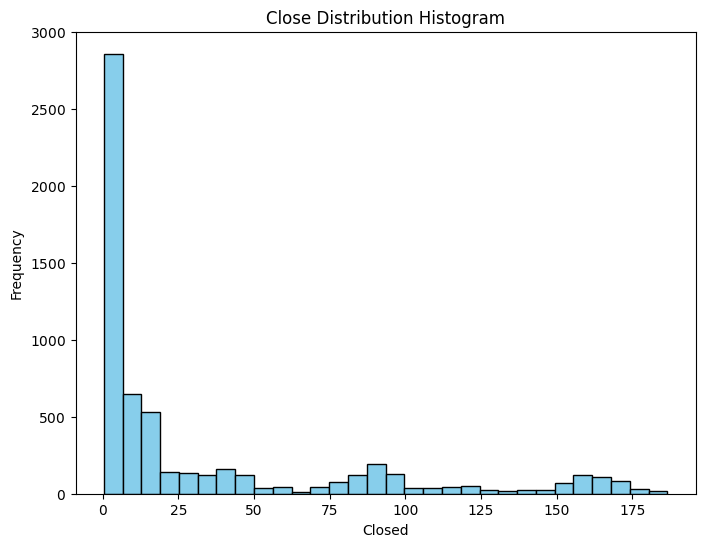

In [14]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(8, 6))
plt.hist(amazon_data['Close'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Closed')
plt.ylabel('Frequency')
plt.title('Close Distribution Histogram')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

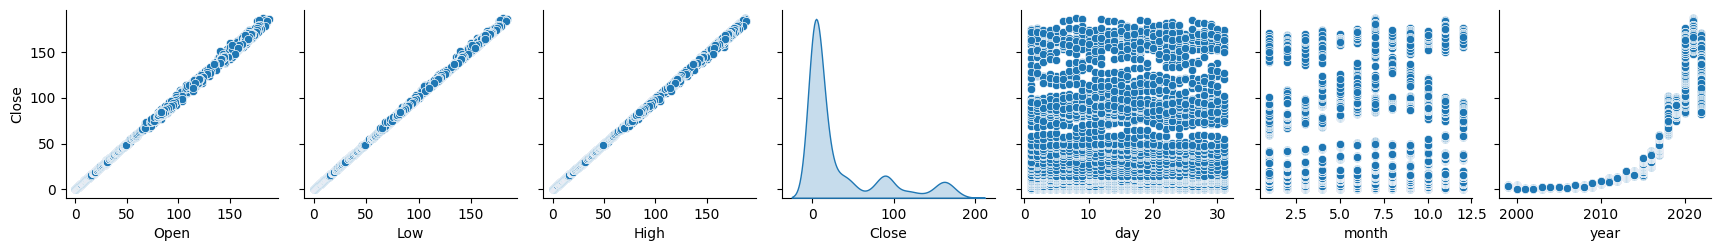

In [15]:
import seaborn as sns
sns.pairplot(amazon_data, x_vars=['Open', 'Low', 'High', 'Close', 'day', 'month', 'year'], y_vars=['Close'], diag_kind='kde')
plt.show()

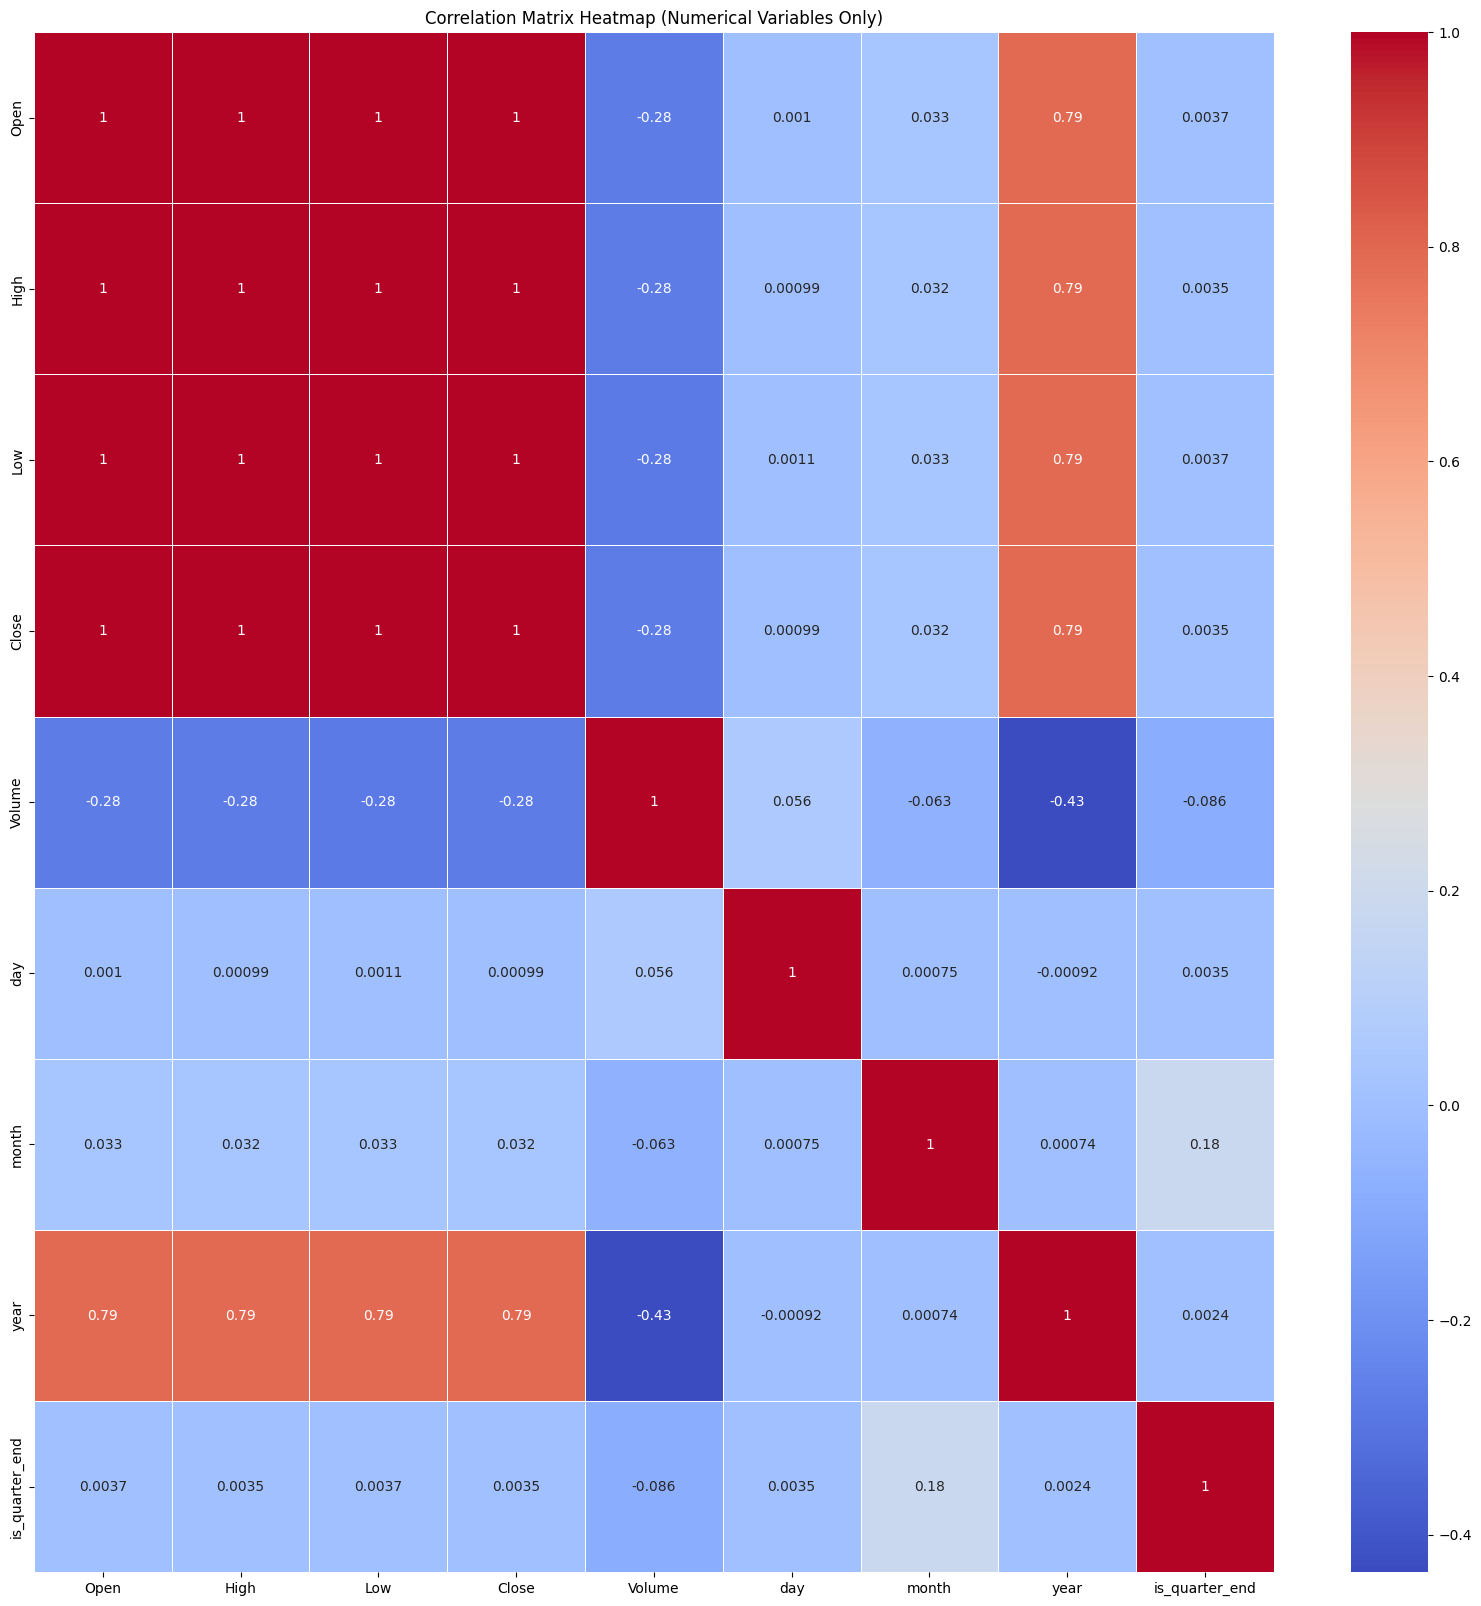

In [16]:
correlation_matrix = amazon_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap (Numerical Variables Only)')
plt.show()

In [18]:
X = amazon_data.drop(columns=['Close', 'day', 'month'], axis=1)
y = amazon_data['Close']

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

models = [
    ('DecisionTree', DecisionTreeRegressor(max_depth=10, random_state=25)),
    ('SupportVectorRegression', SVR()),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge(random_state=42)),
    ('Lasso', Lasso(random_state=42)),
    ('RandomForest', RandomForestRegressor(max_depth=6, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(random_state=42)),
    ('KNeigbors', KNeighborsRegressor(n_neighbors=12))
]

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

for name, model in models:
    model.fit(X_train, y_train)  
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared: {r_squared:.2f}")
    print("----------------------")

Model: DecisionTree
Mean Squared Error (MSE): 0.65
R-squared: 1.00
----------------------
Model: SupportVectorRegression
Mean Squared Error (MSE): 8.79
R-squared: 1.00
----------------------
Model: LinearRegression
Mean Squared Error (MSE): 0.18
R-squared: 1.00
----------------------
Model: Ridge
Mean Squared Error (MSE): 0.32
R-squared: 1.00
----------------------
Model: Lasso
Mean Squared Error (MSE): 1.70
R-squared: 1.00
----------------------


c:\projects\stock_price\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.856e+03, tolerance: 1.149e+03
  model = cd_fast.enet_coordinate_descent(


Model: RandomForest
Mean Squared Error (MSE): 0.48
R-squared: 1.00
----------------------
Model: GradientBoosting
Mean Squared Error (MSE): 0.42
R-squared: 1.00
----------------------
Model: KNeigbors
Mean Squared Error (MSE): 1.41
R-squared: 1.00
----------------------
